In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print(os.listdir("/content/drive/My Drive/BelajarML/dataset"))

['pararius', '.ipynb_checkpoints', 'insurance_kaggle.csv']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("/content/drive/My Drive/BelajarML/dataset/insurance_kaggle.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [65]:
X = df.drop(columns='charges')
y = df['charges']

y_log = np.log1p(y)

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_log = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_log.fit(X_train, y_train_log)

y_pred_linear = linear_log.predict(X_test)

mae_lin = mean_absolute_error(y_test_log, y_pred_linear)
rmse_lin = np.sqrt(mean_squared_error(y_test_log, y_pred_linear))
r2_lin = r2_score(y_test_log, y_pred_linear)

print("Linear Regression (log target)")
print(f"MAE  : {mae_lin:.3f}")
print(f"RMSE : {rmse_lin:.3f}")
print(f"R²   : {r2_lin:.3f}")

feature_names = linear_log.named_steps['preprocessor'].get_feature_names_out()
coefficients = linear_log.named_steps['regressor'].coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

coef_df

Linear Regression (log target)
MAE  : 0.270
RMSE : 0.419
R²   : 0.805


,Feature,Coefficient
1,cat__smoker_yes,1.551519
7,num__children,0.092419
5,num__age,0.034238
6,num__bmi,0.013599
2,cat__region_northwest,-0.056402
0,cat__sex_male,-0.074321
4,cat__region_southwest,-0.122527
3,cat__region_southeast,-0.136027


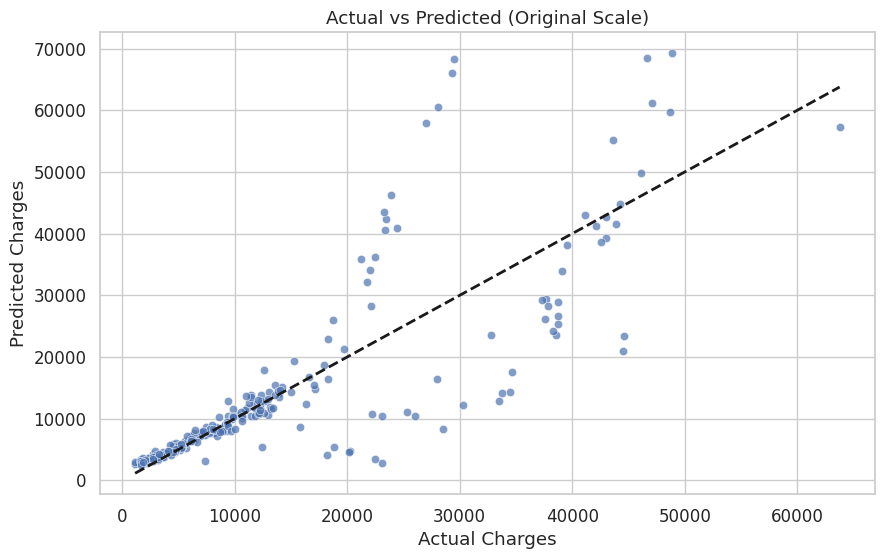

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.1)

y_test_exp = np.exp(y_test_log)
y_pred_exp = np.exp(y_pred_linear)

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_exp, y=y_pred_exp, alpha=0.7)
plt.plot([y_test_exp.min(), y_test_exp.max()],
         [y_test_exp.min(), y_test_exp.max()],
         'k--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted (Original Scale)")
plt.show()

Ridge Regression

In [76]:
from sklearn.linear_model import Ridge

ridge_log = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=10.0))
])

ridge_log.fit(X_train, y_train)

y_pred_ridge = ridge_log.predict(X_test)

mae_ridge = mean_absolute_error(y_test_log, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test_log, y_pred_ridge))
r2_ridge = r2_score(y_test_log, y_pred_ridge)

print("Ridge Regression (log target)")
print(f"MAE  : {mae_ridge:.3f}")
print(f"RMSE : {rmse_ridge:.3f}")
print(f"R²   : {r2_ridge:.3f}")


feature_names = ridge_log.named_steps['preprocessor'].get_feature_names_out()
coefficients = ridge_log.named_steps['regressor'].coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

coef_df

Ridge Regression (log target)
MAE  : 0.277
RMSE : 0.421
R²   : 0.803


,Feature,Coefficient
1,cat__smoker_yes,1.466652
7,num__children,0.092343
5,num__age,0.034129
6,num__bmi,0.013344
2,cat__region_northwest,-0.046713
0,cat__sex_male,-0.066813
4,cat__region_southwest,-0.110101
3,cat__region_southeast,-0.118175


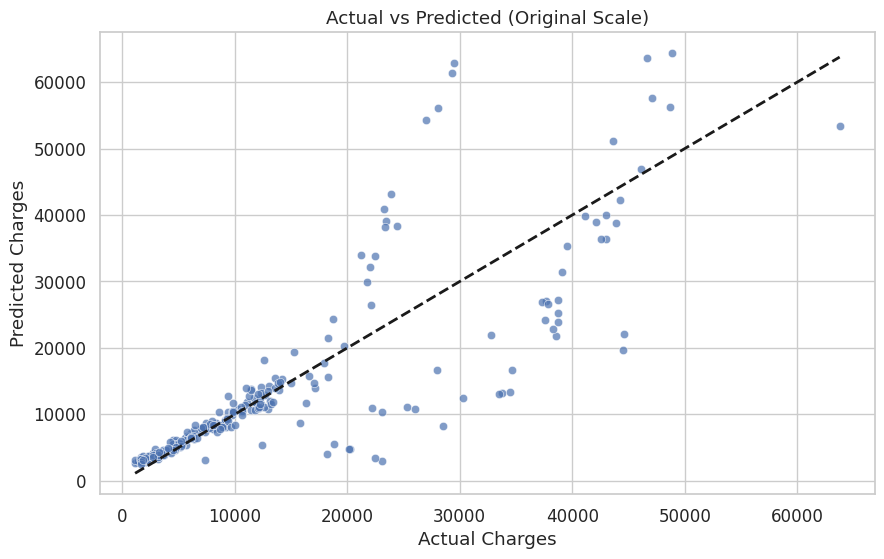

In [77]:
sns.set(style="whitegrid", font_scale=1.1)

y_test_exp = np.exp(y_test_log)
y_pred_exp = np.exp(y_pred_ridge)

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_exp, y=y_pred_exp, alpha=0.7)
plt.plot([y_test_exp.min(), y_test_exp.max()],
         [y_test_exp.min(), y_test_exp.max()],
         'k--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted (Original Scale)")
plt.show()